ANÁLISIS DE DATOS

TALLER 1

Pregunta 1 - Bajando y formateando datos del Banco Mundial
Replique el ejemplo práctico de importar datos desde la API del Banco Mundial y empezar la base para su análisis de series de tiempo.

Importe usted la serie de GDP total Y Percapita para otro país serie desde la API del Banco mundial, muestre sus principales características y realice un grafico.

¿pareciera haber tendencias?

In [2]:
#IMPORTAMOS LOS DATOS DSEDE LA API DEL BANCO MUNDIAL
#pandas remote data access support for calls to the World Bank Indicators API
import pandas as pd
from pandas_datareader import data, wb 
#Revisemos que indicadores hay disponibles. En este caso revisare de PIB (GDP en ingés), pero se pueden explorar muchas más opciones.

wb.search('gdp')

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
689,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
690,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
1503,BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"b'International Monetary Fund, Balance of Paym...",Economy & Growth ; Private Sector ; Trade
...,...,...,...,...,...,...,...
16707,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16708,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
16709,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16710,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [3]:
# Obtengamos la lista de paises disponibles
countries = wb.get_countries()

In [4]:
countries.describe()
countries.head(100)

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.01670,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.17610,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,FCS,F1,Fragile and conflict affected situations,Aggregates,,Aggregates,Aggregates,,NaN,NaN
96,FIN,FI,Finland,Europe & Central Asia,,High income,Not classified,Helsinki,24.95250,60.1608
97,FJI,FJ,Fiji,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,Blend,Suva,178.39900,-18.1149
98,FRA,FR,France,Europe & Central Asia,,High income,Not classified,Paris,2.35097,48.8566


In [5]:
countries.shape

(297, 10)

In [6]:
#IDENTIFIQUEMOS EL REGISTRO DE BRAZIL
countries[countries['name'] == 'Brazil']

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
35,BRA,BR,Brazil,Latin America & Caribbean,Latin America & Caribbean (excluding high income),Upper middle income,IBRD,Brasilia,-47.9292,-15.7801


In [10]:
#Creemos un dataframe con los datos de GDP x capita de un país (country)
#NY.GDP.PCAP.KD es GDP per capita (constant 2010 US$)
p = 'BR'
pp = 'BRASIL'
df_GDPpc_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

df_GDPpc_p.describe()
df_GDPpc_p.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Brazil', '2020') to ('Brazil', '1980')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.PCAP.KD  41 non-null     float64
dtypes: float64(1)
memory usage: 2.0+ KB


In [11]:
df_GDPpc_p.head()

NY.GDP.PCAP.KD
country year                
Brazil  2020     8255.567064
        2019     8592.210218
        2018     8553.864918
        2017     8470.939629
        2016     8426.842251

In [12]:
#Obtengamos ahora el GDP del mismo país
#NY.GDP.MKTP.CD." This code stands for "GDP at market prices" and represents the total economic output of a country or region in current U.S. dollars.
#It is a measure of the overall size and value of an economy.
#New York, GDP, MKTP es market prices, CD es current dollars

df_GDP_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.MKTP.CD.',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

df_GDP_p.describe()
df_GDP_p.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Brazil', '2020') to ('Brazil', '1980')
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NY.GDP.MKTP.CD.  41 non-null     float64
dtypes: float64(1)
memory usage: 2.0+ KB


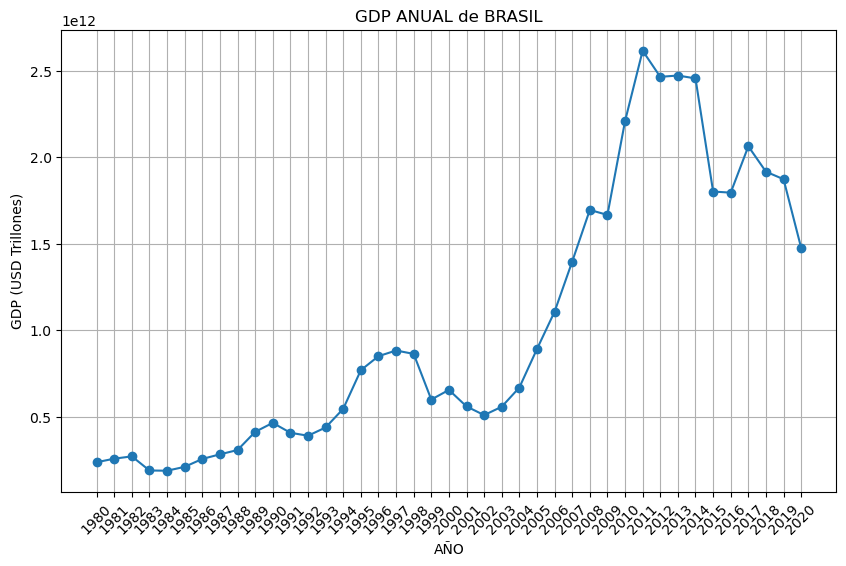

In [15]:
#TOMA LOS DATOS DE GDP, LOS ORDENA OPOR AÑO Y LOS GRAFICA
import matplotlib.pyplot as plt
# El dataframe es: df_GDP_p

# Step 1: Sort by year (oldest to most recent)
df_GDP = df_GDP_p.copy()

df_GDP_sorted = df_GDP.sort_index(level=1, ascending=True)
years = [year for (_, year) in df_GDP_sorted.index]
# Step 2: Plot the 'NY.GDP.MKTP.CD.' column
plt.figure(figsize=(10, 6))
plt.plot(years, df_GDP_sorted['NY.GDP.MKTP.CD.'], marker='o', linestyle='-')
plt.title(f"GDP ANUAL de {pp}")
plt.xlabel('AÑO')
plt.ylabel('GDP (USD Trillones)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines for better readability
plt.show()
#df_GDP_sorted.info


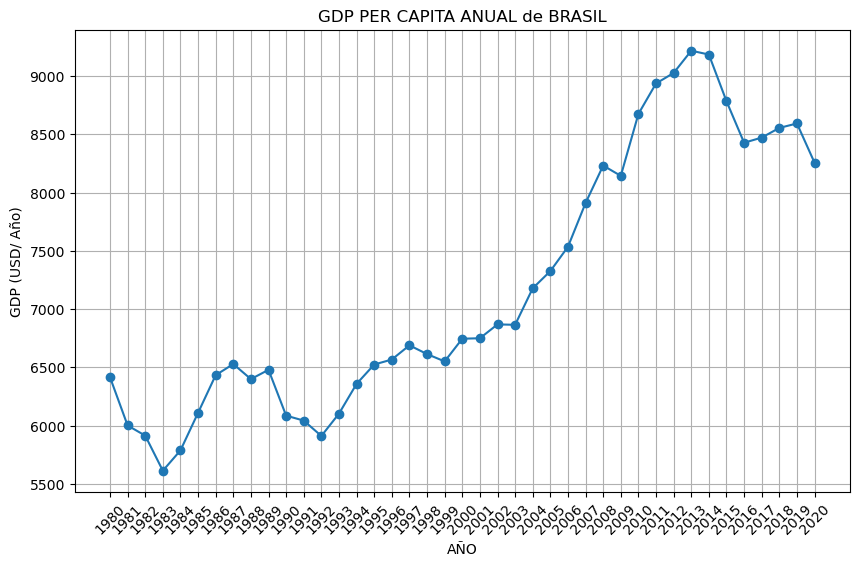

In [16]:
#TOMA LOS DATOS DE GDP PER CAPITA, LOS ORDENA OPOR AÑO Y LOS GRAFICA
#el dataset es: df_GDPpc_p NY.GDP.PCAP.KD

# CREAMOS UNA COPIA, LA ORDENAMOS Y LA GRAFICAMOS
df_GDPpc = df_GDPpc_p.copy()

df_GDPpc_sorted = df_GDPpc.sort_index(level=1, ascending=True)
years = [year for (_, year) in df_GDPpc_sorted.index]
#Ploteamos la columna 'NY.GDP.PCAP.KD.'
plt.figure(figsize=(10, 6))
plt.plot(years, df_GDPpc_sorted['NY.GDP.PCAP.KD'], marker='o', linestyle='-')
plt.title(f"GDP PER CAPITA ANUAL de {pp}")
plt.xlabel('AÑO')
plt.ylabel('GDP (USD/ Año)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines for better readability
plt.show()
#df_GDPpc_sorted.info


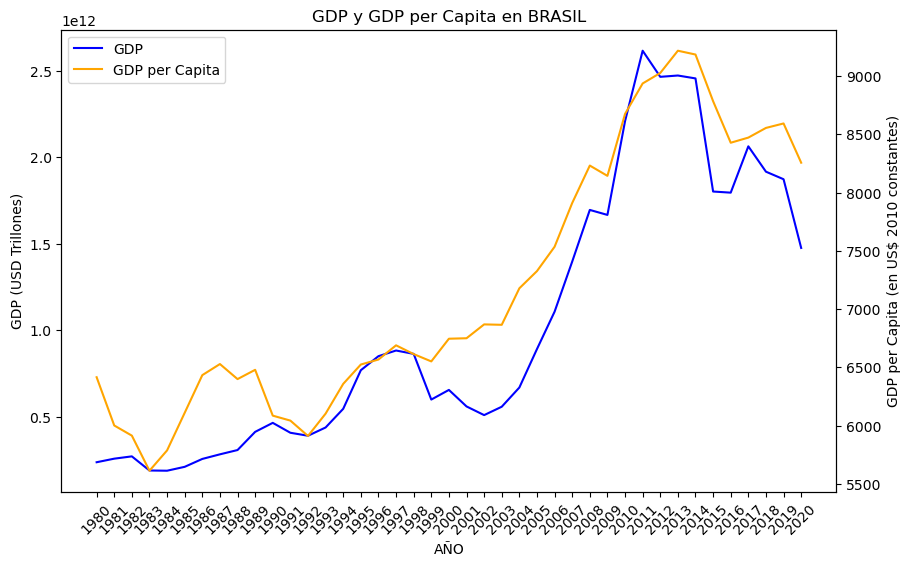

In [17]:
#GRAFICAMOS AMBOS
#Graficamos GDP y GDP per cap en un mismo gráfico para hacer un análisis visual e identificar algún patrón en la data
import matplotlib.pyplot as plt

# Assuming 'GDPxCAP' and 'GDP' are the names of your DataFrames
#df_GDPpc_sorted, df_GDP_sorted

# Reset index for both DataFrames
df_GDPpc_sorted_reset = df_GDPpc_sorted.reset_index()
df_GDP_sorted_reset = df_GDP_sorted.reset_index()

# Extract years and GDP values
years = df_GDP_sorted_reset['year']
df_GDP_sorted_values = df_GDP_sorted_reset['NY.GDP.MKTP.CD.']
df_GDPpc_sorted_values = df_GDPpc_sorted_reset['NY.GDP.PCAP.KD']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot GDP
ax.plot(years, df_GDP_sorted_values, label='GDP', color='blue')

# Plot GDP per Capita on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(years, df_GDPpc_sorted_values, label='GDP per Capita', color='orange')

# Set labels and titles
ax.set_xlabel('AÑO')
ax.set_ylabel('GDP (USD Trillones)')
ax2.set_ylabel('GDP per Capita (en US$ 2010 constantes)')
plt.title(f"GDP y GDP per Capita en {pp}")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Show the plot
plt.show()


In [22]:
#Calculemos la correlación entre GDP y GDP per cap
#Las series son: NY.GDP.PCAP.KD	y NY.GDP.MKTP.CD.
import pandas as pd

#Separamos las dos series que queremos corelacionar: df_GDPpc_sorted, df_GDP_sorted
GDP = df_GDP_sorted['NY.GDP.MKTP.CD.']
GDP_per_cap = df_GDPpc_sorted['NY.GDP.PCAP.KD']

# Usamos el método corr para calcular la correlación
correlation = GDP.corr(GDP_per_cap)
print(f"La correlación entre GDP y GDP per cap en {pp} es: {correlation}")


La correlación entre GDP y GDP per cap en BRASIL es: 0.9674066966771737


Como podemos ver, la correlación entre el GDP y el GDP per cápita es directa y fuerte.

****** Pregunta 2 - Investigando sobre países:
Considere que tenemos los datos del banco mundial, del país que selecciono anteriormente, y desea aprender sobre alguna caracterpistica de dicho pais en el periodo.

Escriba una pregunta de investigación que se pueda responder con los datos disponibles. ¿Cómo definiria la variable aleatoria relevante? ¿Qué hipótesis podria responder su pregunta?

#PREGUNTA 2: INVESTIGUEMOS SOBRE MORTALIDAD

In [23]:
#INVESTIGUEMOS MORTALIDAD DE BRASIL
#p = 'BR'
from pandas_datareader import data, wb

# Define the indicators you want to retrieve (replace with your desired indicators)
indicators = {
    "SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)",
    "SP.POP.TOTL": "Population, total",
}

# Specify the countries or regions you're interested in (replace with your desired countries)
#countries = ["USA", "CHN", "IND", "AUS"]
countries = [p]

# Set the date range
data_date = ("1980", "2020")

df_Mort_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='SH.DYN.MORT',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

# Fetch the data from the World Bank API

# Print the retrieved data
df_Mort_p.head()

SH.DYN.MORT
country year             
Brazil  2020         14.7
        2019         14.9
        2018         15.2
        2017         15.4
        2016         16.7

In [24]:
#UNAMOS LOS DATAFRAME DE MORTALIDAD e INGRESO PC EN UNO SOL DF PARA GRAFICARLO
#Unamos los dos dataframe en uno: df_GDPpc_p Y df_Mort_p
df_1 = pd.merge(df_GDPpc_p, df_Mort_p, how='right', on='year')
df_1.describe()

,NY.GDP.PCAP.KD,SH.DYN.MORT
count,41.000000,41.000000
mean,7190.314501,42.380488
std,1116.555886,25.741564
min,5613.610873,14.700000
25%,6399.483631,18.600000
50%,6745.856994,34.700000
75%,8255.567064,63.200000
max,9216.131219,96.300000


In [25]:
#ORDENEMOS LOS DF POR AÑO
#Ordenamos primero el de GDP x CAP
#Lo copio par que no me modifique el dataframe original
df_GDPpc_p.head()
df_GDPpc_p_copy = df_GDPpc_p.copy()
#reseteo el índice
df_GDPpc_p_copy.reset_index(inplace = True)
#Ahora lo ordeno
df_GDPpc_p_copy_sorted = df_GDPpc_p_copy.sort_values(by='year')
#Reseteo el indice
df_GDPpc_p_copy_sorted.set_index(['year'], inplace=True)
df_GDPpc_p_copy_sorted.head()


,country,NY.GDP.PCAP.KD
year,,
1980,Brazil,6415.637075
1981,Brazil,6001.644299
1982,Brazil,5914.564397
1983,Brazil,5613.610873
1984,Brazil,5788.086505


In [26]:
#ORDENEMOS LOS DF POR AÑO
#Ahora ordenamos el de Mortalidad
#Lo copio par que no me modifique el dataframe original
#df_Mort_p

df_Mort_p_copy = df_Mort_p.copy()
#reseteo el índice
df_Mort_p_copy.reset_index(inplace = True)
#Ahora lo ordeno
df_Mort_p_copy_sorted = df_Mort_p_copy.sort_values(by='year')
#Reseteo el indice
df_Mort_p_copy_sorted.set_index(['year'], inplace=True)
df_Mort_p_copy_sorted.head()

,country,SH.DYN.MORT
year,,
1980,Brazil,96.3
1981,Brazil,92.0
1982,Brazil,87.8
1983,Brazil,84.0
1984,Brazil,80.4


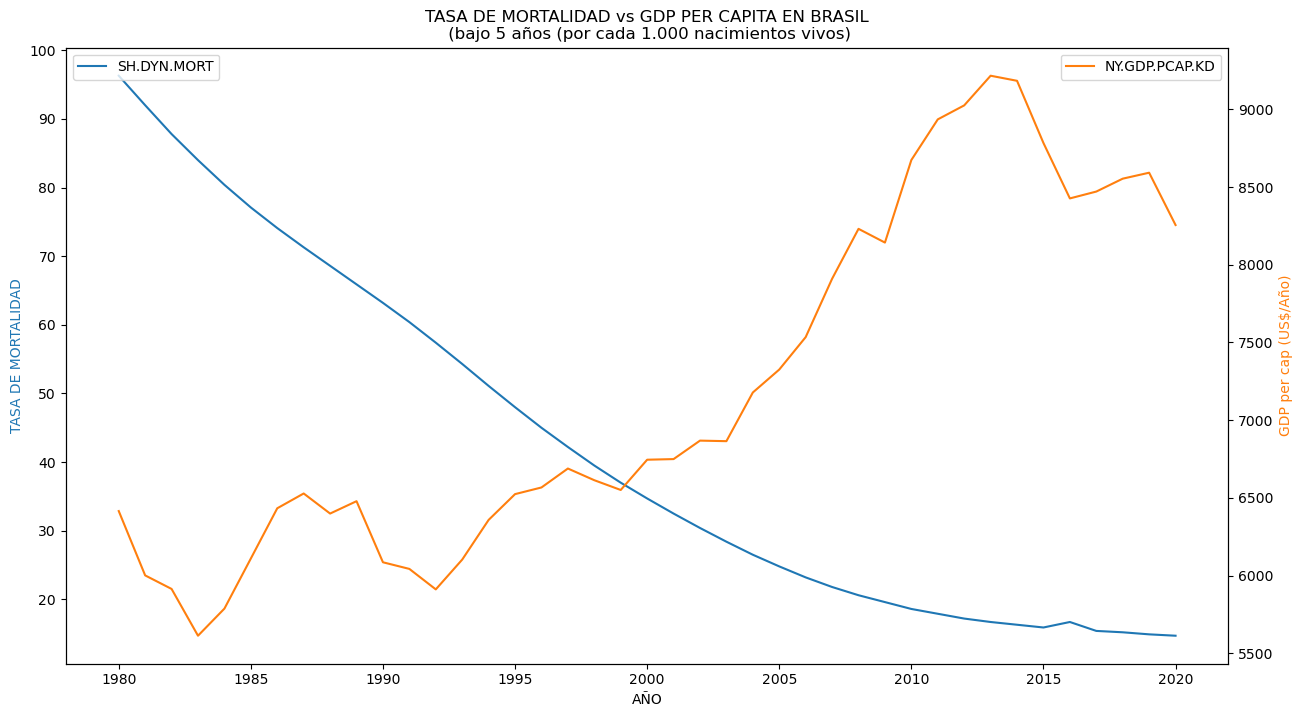

In [27]:
#GRAFIQUEMOS MORTALIDAD e INGRESO X CAP
import matplotlib.pyplot as plt

#df_Mort_p_copy_sorted
#df_GDPpc_p_copy_sorted

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize = (15, 8))

#Recordar que: SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)
# Plot Mortalidad data on the primary axis
df_Mort_p_copy_sorted['1980':].plot(ax=ax1, label='MORTALIDAD (xx/xx)', color='tab:blue')

# Set y-axis label for the primary axis
ax1.set_ylabel('TASA DE MORTALIDAD', color='tab:blue')

# Create a secondary axis sharing the same x-axis
ax2 = ax1.twinx()

plt.title(f"TASA DE MORTALIDAD vs GDP PER CAPITA EN {pp}\n (bajo 5 años (por cada 1.000 nacimientos vivos)")

# Plot GDP per capita data on the secondary axis
df_GDPpc_p_copy_sorted['1980':].plot(ax=ax2, label='GDP per cap (US$/Año)', color='tab:orange')

# Set y-axis label for the secondary axis
ax2.set_ylabel('GDP per cap (US$/Año)', color='tab:orange')

# Set x-axis label
ax1.set_xlabel('AÑO')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


PRUEBA DE HIPÓTESIS:

H0: no hay correlación significativa entre la  mortalidad y el GDP per Capita

H1: existe una correlación negativa significativa entre la mortalidad y el GDP per capita


In [417]:
#CALCULEMOS LA CORRELACIÓN ENTRE MORTALIDAD e GDP PER CAPITa
#Las series son: NY.GDP.PCAP.KD	y NY.GDP.MKTP.CD.
import pandas as pd

#Separamos las dos series que queremos corelacionar
MORT = df_1_sorted['SH.DYN.MORT']
GDP_per_cap = df_1_sorted['NY.GDP.PCAP.KD']

# Usamos el método corr para calcular la correlación
correlacion = MORT.corr(GDP_per_cap)
if correlacion >= 0:
    print(f"La correlación entre MORTALIDAD y GDP per cap en {pp} es: ", correlacion)
else:
    print(f"La correlación entre MORTALIDAD y GDP per cap en {pp} es INVERSA: ", correlacion)

La correlación entre MORTALIDAD y GDP per cap en BRASIL es INVERSA:  -0.8459411434089594


In [418]:
#CÁLCULO DEL P VALOR
import scipy.stats as stats

# Calcular la t-test para dos muestras independientes
t_stat, p_value = stats.ttest_ind(MORT, GDP_per_cap)
correlation, p_value = stats.pearsonr(MORT, GDP_per_cap)
print(f'Coeficiente de correlación: {correlation}')
print(f'P-valor: {p_value}')

Coeficiente de correlación: -0.8459411434089593
P-valor: 3.3366070131702757e-12


##EN CONCLUSIÓN SOBRE EL P VALOR: ?? Parece ser suficientemente pequeño 3.33 x 10 e -12. Aceptamos o rechazamos H0?

El **Valor de probabilidad (ó p-valor)** es el nivel probabilidad más
alto para el cual no podemos rechazar la hipótesis nula de la prueba de
significancia.